<a href="https://colab.research.google.com/github/irythmgarg/Email_spam_Classifier/blob/main/Email_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet link -: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# **Importing Dependencies**

In [2]:
import pandas as pd
import numpy as np

# **LOADING DATASET**

In [3]:
spam=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [4]:
spam.head() # dataset overview

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
spam.iloc[2,1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

# **DATA PREPROCESSING**

In [6]:
spam.shape # no of rows and columns

(5572, 5)



checking null values

In [7]:
spam.isna().sum().sum() # count of null values

16648

check the columns of NULL values

In [8]:
spam.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


## **we can conclude that last three columns are almost empty so lets remove thses columns**

In [9]:
spam=spam.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1);
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam.rename(columns={'v1':'target','v2':'data'},inplace=True); # renaming columns for convenience
spam.head()

,target,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


encoding target values in numerical

spam --> 1

not spam --> 0

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder();
spam['target']=encoder.fit_transform(spam['target']);
spam.head()

,target,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
for index, class_label in enumerate(encoder.classes_):
    print(f"Class '{class_label}' is assigned label {index}")

Class 'ham' is assigned label 0
Class 'spam' is assigned label 1


checking duplicate rowss

In [13]:
spam.duplicated().sum() # 403 duplicate rows

403

In [14]:
df=spam.drop_duplicates(keep='first'); # removing duplicate rows
df.duplicated().sum()

0

In [15]:
spam.isna().sum().sum()

0

In [16]:
df.shape

(5169, 2)

# **EDA**

In [38]:
from matplotlib import pyplot as plt # importing dependencies
import seaborn as sns

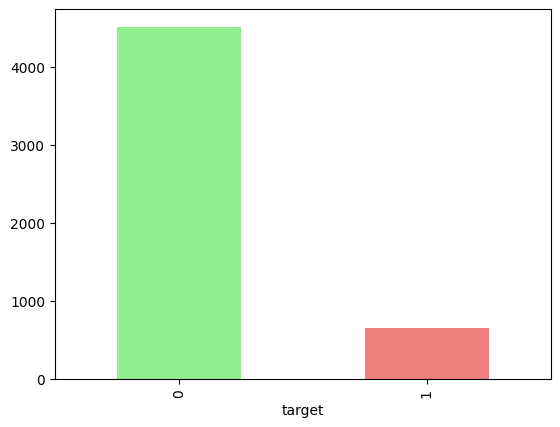

In [39]:
df['target'].value_counts().plot(kind='bar',color=['lightgreen', 'lightcoral']); # number of spam and non spam emails

In [40]:
labels=['not spam', 'spam'] # labels to be shown on pie plot

<Axes: ylabel='count'>

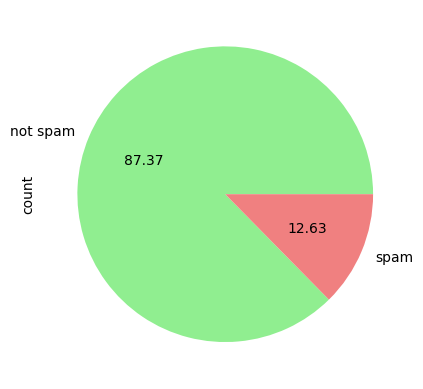

In [41]:
df['target'].value_counts().plot(kind='pie', labels=labels, autopct="%0.2f", colors=['lightgreen', 'lightcoral'])

we can conclude that 12 % of the emails of the total emails are spam others are not spam

In [42]:
! pip install nltk

In [43]:
import nltk

In [44]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
df['noofcharacters']=df['data'].apply(len); # no of characters in each email

<ipython-input-45-2e292b6f60f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noofcharacters']=df['data'].apply(len); # no of characters in each email


In [46]:
df['noofwords']=df['data'].apply(lambda x:len(nltk.word_tokenize(x))); # no of words in each email

<ipython-input-46-78d1a019e77f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noofwords']=df['data'].apply(lambda x:len(nltk.word_tokenize(x))); # no of words in each email


In [47]:
df.head()

,target,data,noofcharacters,noofwords,noofsentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [48]:
df['noofsentences']=df['data'].apply(lambda x:len(nltk.sent_tokenize(x))); # no of sentence in each email

<ipython-input-48-28557306d5f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['noofsentences']=df['data'].apply(lambda x:len(nltk.sent_tokenize(x))); # no of sentence in each email


In [49]:
df.head()

,target,data,noofcharacters,noofwords,noofsentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


analysing spam and ham mails separately

In [50]:
df[df['target']==0][['noofcharacters','noofwords','noofsentences']].describe()   # not  spam category

,noofcharacters,noofwords,noofsentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
df[df['target']==1][['noofcharacters','noofwords','noofsentences']].describe()      # spam category

,noofcharacters,noofwords,noofsentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


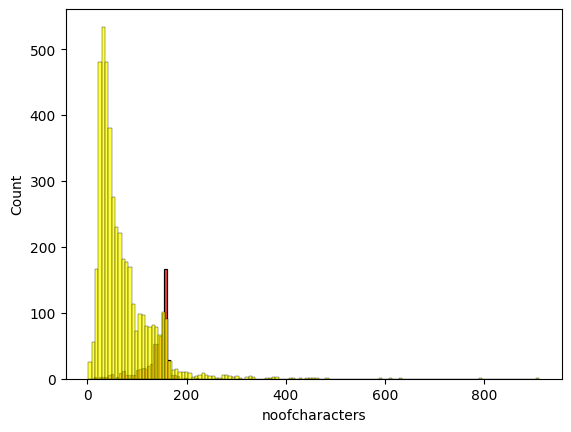

In [52]:
import seaborn as sns
sns.histplot(df[df['target']==1]['noofcharacters'],color='red'); # distribution of no of characters in spam emails
sns.histplot(df[df['target']==0]['noofcharacters'],color='yellow'); # distribution of no of characters in non spam emails

**we can clearly see that number of characters in spam are more than non spam**

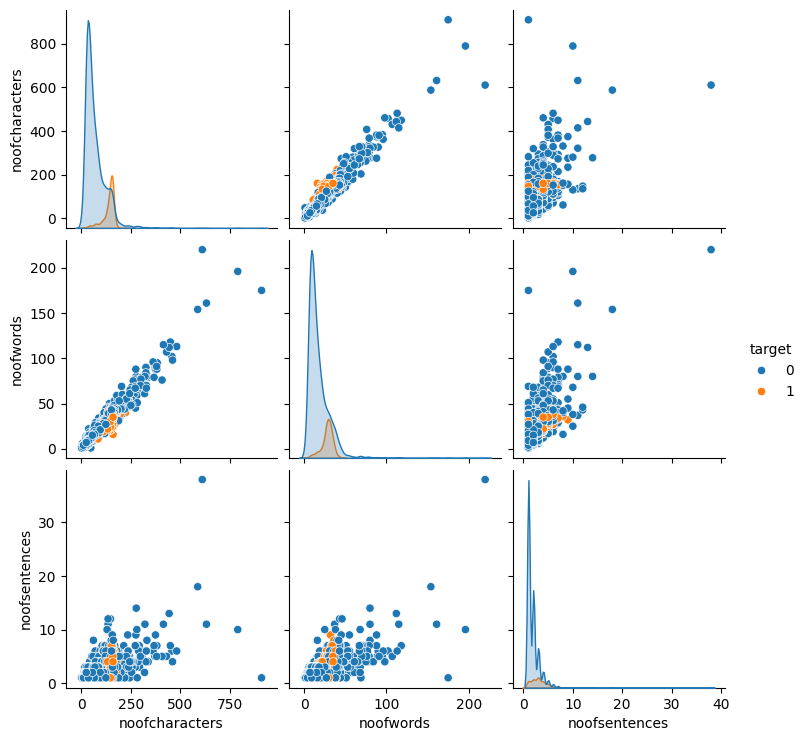

In [53]:
sns.pairplot(df,hue='target')

<Axes: >

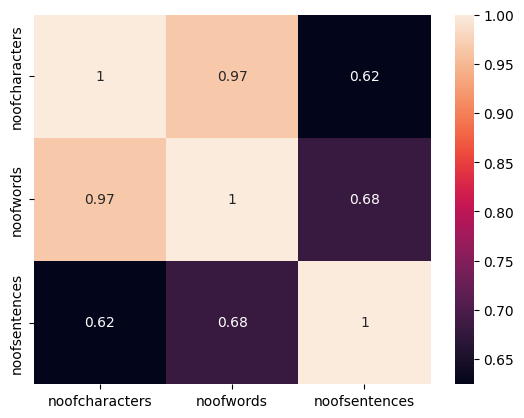

In [54]:
sns.heatmap(df.drop(columns=['data','target']).corr(),annot=True)

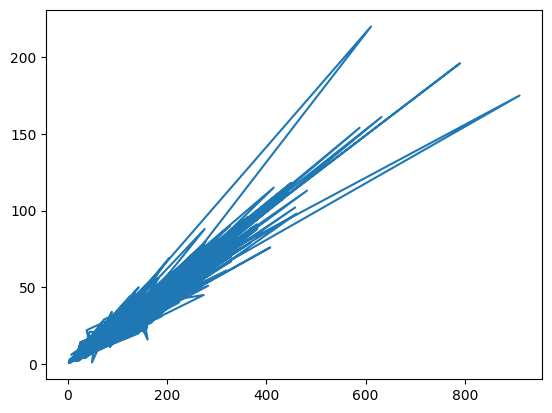

In [55]:
plt.plot(df['noofcharacters'],df['noofwords'])

we can see that no of words and number of characters are mostly directly proportional to each other

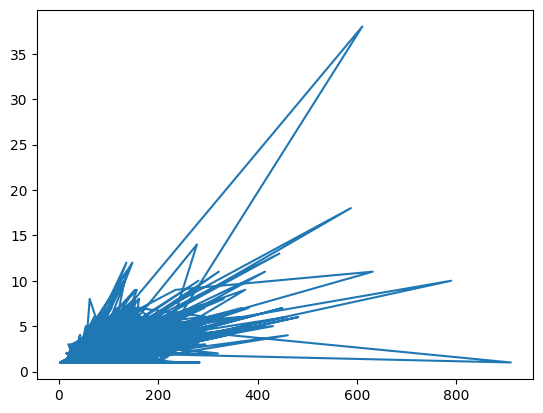

In [56]:
plt.plot(df['noofcharacters'],df['noofsentences'])

# **TEXT PREPROCESSING**

HOW ISALNUM WORKS
it basically checks that the chacater is alphanumeric or not

In [110]:
X=['hi','my','na%m&e','is'];

In [108]:
for i in (X):
 if i.isalnum():
  print(i);

hi
my
is


In [109]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import PorterStemmer
ps=PorterStemmer();
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Create a PorterStemmer object
ps = PorterStemmer()

def transformtext(obj):
    # Convert text to lowercase
    text = obj.lower()

    # Tokenize text
    text = word_tokenize(text)

    # Remove non-alphanumeric tokens
    text = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    text = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]

    # Apply stemming
    text = [ps.stem(i) for i in text]

    return " ".join(text)

# Example usage
input_text = "It is very important to be pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."
transformed_text = transformtext(input_text)
print(transformed_text)


import pythonli python python python python poorli least


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **this function will do**

# stemming

# remove punctuations

# remove stopwords

# remove special characters

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

def transformtext(obj):
    text = obj.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y = []
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sample transformation from the function

In [61]:
print(transformtext('hi my name% is aman&. what are you doing guy'))

hi name aman guy


In [62]:
df['transtext']=df['data'].apply(transformtext);

<ipython-input-62-cf99d64365d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transtext']=df['data'].apply(transformtext);


In [63]:
df.head()

,target,data,noofcharacters,noofwords,noofsentences,transtext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(width=500,height=500,min_font_size=5,background_color='white');


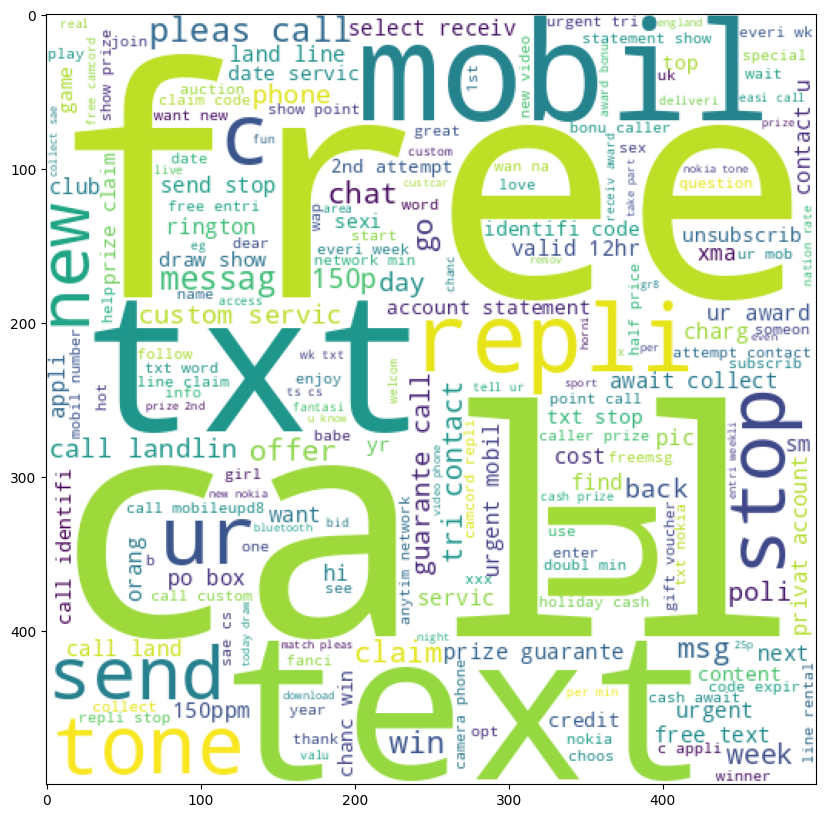

In [65]:
wc.generate(df[df['target']==1]['transtext'].str.cat(sep=' ')) # mostly used words in spam mails
plt.figure(figsize=(10,10))
plt.imshow(wc)

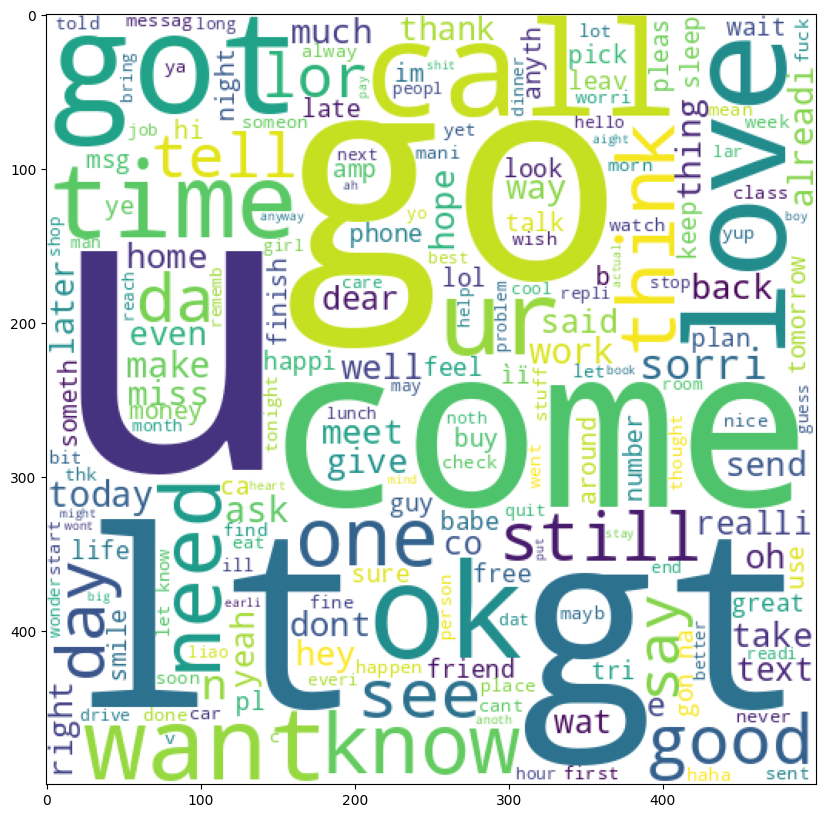

In [66]:
wc.generate(df[df['target']==0]['transtext'].str.cat(sep=' ')) # mostly used words in ham mails
plt.figure(figsize=(10,10))
plt.imshow(wc)

In [67]:
li=[];
for msg in df[df['target']==1]['transtext']:
  for word in msg.split():
    li.append(word);

In [68]:
len(li)

9939

In [69]:
from collections import Counter # library to make a dictionary which counts occurance of each word
Counter(li).most_common(55)  # 55 most occuring words in spam mails

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30),
 ('150ppm', 29),
 ('video', 29),
 ('1', 28),
 ('voucher', 28),
 ('code', 27)]

In [70]:
mostoccur=pd.DataFrame(Counter(li).most_common(55),columns=['word','count']);
mostoccur

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [71]:
li=[];
for msg in df[df['target']==0]['transtext']:
  for word in msg.split():
    li.append(word);

In [72]:
from collections import Counter # library to make a dictionary which counts occurance of each word
Counter(li).most_common(55)  # 55 most occuring words in ham mails

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129),
 ('say', 127),
 ('back', 127),
 ('today', 123),
 ('hope', 122),
 ('ask', 121),
 ('sorri', 121),
 ('n', 120),
 ('send', 120),
 ('r', 120),
 ('work', 118),
 ('dont', 118),
 ('meet', 112),
 ('hi', 111),
 ('well', 109),
 ('thing', 109),
 ('wat', 108),
 ('k', 107),
 ('much', 107),
 ('night', 107),
 ('oh', 106),
 ('miss', 106),
 ('happi', 104),
 ('give', 102),
 ('later', 100),
 ('hey', 100)]

In [73]:
mostoccur=pd.DataFrame(Counter(li).most_common(55),columns=['word','count']);
mostoccur

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


In [74]:
df.head()

,target,data,noofcharacters,noofwords,noofsentences,transtext
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **VECTORISATION**

for converting text into numerical vectors

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words='english')

In [127]:
X=cv.fit_transform(df['transtext']).toarray();

In [77]:
y=df['target'];

In [78]:
from sklearn.model_selection import train_test_split # spliting data into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2);

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # naive bayes because it is good for textual data
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score #for performance measurment

In [80]:
gnb=GaussianNB();  # will check from these 3 and will keep the best
mnb=MultinomialNB();
bnb=BernoulliNB();

In [81]:
gnb.fit(X_train,y_train);   # calculating accuracy , precision and cofudion matrix for GaussianNb
y_pred1=gnb.predict(X_test);
print("GNB is",accuracy_score(y_test,y_pred1));
print(confusion_matrix(y_test,y_pred1));
print(precision_score(y_test,y_pred1));

GNB is 0.8733075435203095
[[786 110]
 [ 21 117]]
0.5154185022026432


In [82]:
mnb.fit(X_train,y_train);   # calculating accuracy , precision and cofudion matrix for MultinomialNb
y_pred2=mnb.predict(X_test);
print("MNB is",accuracy_score(y_test,y_pred2));
print(confusion_matrix(y_test,y_pred2));
print(precision_score(y_test,y_pred2));

MNB is 0.9758220502901354
[[882  14]
 [ 11 127]]
0.900709219858156


In [83]:
bnb.fit(X_train,y_train);   # calculating accuracy , precision and cofudion matrix for BernoulliNB
y_pred3=bnb.predict(X_test);
print("BNB is",accuracy_score(y_test,y_pred3));
print(confusion_matrix(y_test,y_pred3));
print(precision_score(y_test,y_pred3));

BNB is 0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


# **trying other algorithms and ensemble classifiers**

In [84]:
from sklearn.linear_model import LogisticRegression # testing all these algorithms to compare their results
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [85]:
LR=LogisticRegression();
DT=DecisionTreeClassifier(max_depth=5);
RF=RandomForestClassifier(n_estimators=50);
KNN=KNeighborsClassifier();
ABC=AdaBoostClassifier(n_estimators=50);
GBC=GradientBoostingClassifier(n_estimators=50);
BC=BaggingClassifier();

In [86]:
classifiers={'LR':LR,'DT':DT,'RF':RF,'KNN':KNN,'ABC':ABC,'GBC':GBC,'BC':BC};

In [87]:
for name,clf in classifiers.items():
  clf.fit(X_train,y_train);
  y_pred=clf.predict(X_test);
  print(name);
  print("Accuracy",accuracy_score(y_test,y_pred));
  print("Precision",precision_score(y_test,y_pred));

# here precision matters which is very high in knn but its accuracy is low so good option
# till now is bnb

LR
Accuracy 0.9787234042553191
Precision 0.9833333333333333
DT
Accuracy 0.9303675048355899
Precision 0.84375
RF
Accuracy 0.9729206963249516
Precision 0.9661016949152542
KNN
Accuracy 0.9090909090909091
Precision 1.0
ABC
Accuracy 0.9593810444874274
Precision 0.9137931034482759
GBC
Accuracy 0.9448742746615088
Precision 0.9550561797752809
BC
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [88]:
estimators=[('lr',LR),('rf',RF),('bnb',bnb)];  # these are the most accurate and have good precision so ensemble model will be made using these

In [89]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard');  # checking for voting ensemble technique for hard voting
vc.fit(X_train,y_train);
y_pred=vc.predict(X_test);
print("VC is",accuracy_score(y_test,y_pred));
print('cross_val_score_accuracy',cross_val_score(vc,X,y,cv=10,scoring='accuracy').mean());
print('cross_val_score_precision',cross_val_score(vc,X,y,cv=10,scoring='precision').mean());

VC is 0.9816247582205029
cross_val_score_accuracy 0.980460093263161
cross_val_score_precision 0.9963961038961038


In [ ]:
vc2=VotingClassifier(estimators=estimators,voting='soft'); # checking for voting ensemble technique for soft voting
vc2.fit(X_train,y_train);
y_pred2=vc2.predict(X_test);
print("VC2 is",accuracy_score(y_test,y_pred2));
print('cross_val_score',cross_val_score(vc2,X,y,cv=10,scoring='accuracy').mean());
print('cross_val_score',cross_val_score(vc2,X,y,cv=10,scoring='precision').mean());

VC2 is 0.9816247582205029


In [91]:
from sklearn.ensemble import StackingClassifier # checking for stacking ensemble technique
sc=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression());
sc.fit(X_train,y_train);
y_pred3=sc.predict(X_test);
print("SC is",accuracy_score(y_test,y_pred3));
print('cross_val_score',cross_val_score(sc,X,y,cv=10,scoring='accuracy').mean());
print('cross_val_score',cross_val_score(sc,X,y,cv=10,scoring='precision').mean());

SC is 0.9845261121856866
cross_val_score 0.9833618220802783
cross_val_score 0.9751604897553214


# **here precision is very important parameter as if there was a important mail and model predicts it as spam , the model is baseless**

# **so due to this reason we are going to make fix the voting classifier as our final model due to its high accuracy and precision**

In [92]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **testing**

In [148]:
sampledata="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
topredict=transformtext(sampledata);
transformed_text = cv.transform([topredict]).toarray()


In [149]:
vc.predict(transformed_text)

array([1])